In [20]:
import numpy as np
from numpy import linalg as nla
import matplotlib.pyplot as pl
%matplotlib inline
from seaborn import heatmap

In [2]:
def sane_quiver(vs, ax=None, colors=None):
    '''plot(0, 0) origin column vectors'''
    vs = np.asarray(vs)
    assert vs.ndim == 2 and vs.shape[1] == 2 # ensure column vectors
    n = vs.shape[0]
    if not ax: 
        ax = pl.gca()
    zs = np.zeros(n)
    xs = vs.T[0]
    ys = vs.T[1]
    props = dict(angles='xy', scale=1, scale_units='xy')
    ax.quiver(zs, zs, xs, ys, color=colors, **props)
    ax.set_aspect('equal')
    ax.set_axis_off()
    _min, _max = vs.min()-1, vs.max()+1
    ax.set_xlim(_min, _max)
    ax.set_ylim(_min, _max)

In [22]:
def zeroing_givens_coeffs(x, z):
    """ for the values x, z, compute cos th, sin th
    s.t. applying a Givens rotation G(cos th, sin th)
    on 2 rows or cols, with values x, z maps x-->r and z --> $\theta$
    """
    if z == 0.0: # better : abs(z) < np.finfo(np.double).eps
        return 1.0, 0.0
    r = np.hypot(x, z) # c99 hypot is safe for under/overflow
    return x/r, -z/r

In [3]:
x = np.array([1.0, 1.0])
theta = np.pi/2
sin_th = np.sin(theta)
cos_th = np.cos(theta)
givens_rot = np.array([[cos_th, sin_th],
                      [-sin_th, cos_th]])

array([1., 1.])

In [15]:
givens_rot.T.dot(x), x.dot(givens_rot.T)

(array([-1.,  1.]), array([ 1., -1.]))

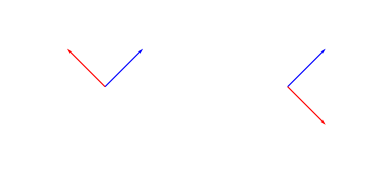

In [12]:
fig, (axL, axR) = pl.subplots(1, 2)
# G.T.dot(X)
sane_quiver([x, givens_rot.T.dot(x)], axL, colors=['b','r'])
# X.dot(G)
sane_quiver([x, x.dot(givens_rot.T)], axR, colors=['b', 'r'])
axR.quiver()

In [25]:
np.copysign(-4, 3)

4.0

Translating from Stan, taken [here](https://github.com/pourzanj/TfRotationPca/blob/master/Stan/Ppca.stan)

In [ ]:
def matrix_left_rotation(A, angle, n, p, i, j):
    RA = A.copy()
    RA[i] = np.cos(angle) * A[i] - np.sin(angle) * A[j]
    RA[j] = np.sin(angle) * A[i] + np.cos(angle) * A[j]